In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from pydataset import data
from sklearn import preprocessing
import matplotlib.pyplot as plt
plt.rc("font",size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns 
sns.set(style="white")
sns.set(style="whitegrid",color_codes = True)

In [3]:
temp = pd.read_csv('calibrado.csv')
temp.head()

,celsius,calibrado
0,18.08,1
1,18.08,1
2,17.60,1
3,17.60,1
4,17.60,1


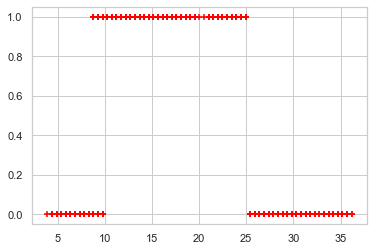

In [4]:
plt.scatter(temp.celsius,temp.calibrado,marker="+",color="red")
plt.show()

In [116]:
temp = temp.drop_duplicates()

In [9]:
temp.head(600)

,celsius,calibrado
0,18.08,1
2,17.60,1
7,17.11,1
12,16.62,1
22,16.13,1
23,15.64,1
42,15.15,1
54,14.66,1
108,14.17,1
119,13.69,1


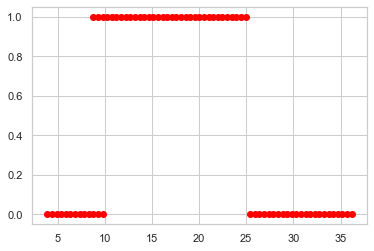

In [11]:
plt.scatter(temp.celsius,temp.calibrado,color="red")
plt.show()

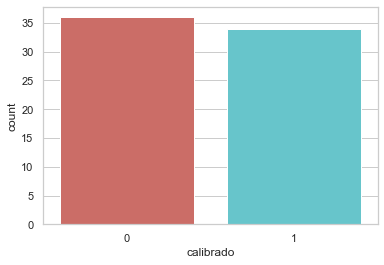

In [117]:
sns.countplot(x = 'calibrado',data = temp,palette='hls')
plt.show()

# Prueba 1

In [120]:
x1_train,x1_test,y1_train,y1_test = train_test_split(temp[['celsius']],temp.calibrado,test_size=0.1)

In [11]:
model = LogisticRegression(solver='lbfgs',max_iter = 1000)

In [126]:
model.fit(temp[['celsius']],temp[['calibrado']])

LogisticRegression(max_iter=1000)

In [10]:
model.predict(x1_test)

NameError: name 'model' is not defined

In [128]:
model.score(x1_test,y1_test)

0.5714285714285714

In [129]:
print(np.array(y1_test))

[1 0 0 1 1 0 0]


In [37]:
temp2 = pd.read_csv('calibrado_test.csv')

In [39]:
model.score(temp2[['celsius']],temp2[['calibrado']])


0.558

# Prueba 2

In [5]:
import warnings
warnings.filterwarnings('ignore')
temp_train2 = pd.read_csv('calibrado.csv')
x_train2=temp[['celsius']]
y_train2 =temp[['calibrado']]

In [14]:
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
columns = x_train2.columns
os_data_x,os_data_y = os.fit_resample(x_train2,y_train2)
os_data_x = pd.DataFrame(data= os_data_x,columns=columns)
os_data_y = pd.DataFrame(data= os_data_y,columns=['calibrado'])

print(len(os_data_x))
print(len(os_data_y[os_data_y['calibrado']==0]))
print(len(os_data_y[os_data_y['calibrado']==1]))
print("\n\n")
print(len(os_data_y[os_data_y['calibrado']==0])/len(os_data_x))
print(len(os_data_y[os_data_y['calibrado']==1])/len(os_data_x))

1514
757
757



0.5
0.5


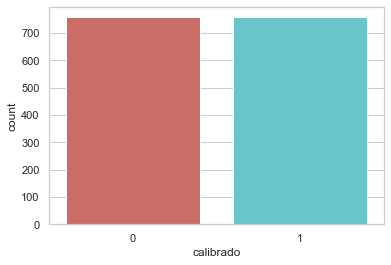

In [15]:
sns.countplot(x = 'calibrado',data = os_data_y,palette='hls')
plt.show()

In [29]:
x2_train,x2_test,y2_train,y2_test = train_test_split(temp_train2[['celsius']],temp_train2.calibrado,test_size=0.1)

In [30]:
model.fit(temp_train2[['celsius']],temp_train2[['calibrado']])

LogisticRegression(max_iter=1000)

In [31]:
model.score(x2_test,y2_test)

0.7446808510638298

In [19]:
model.score(temp2[['celsius']],temp2[['calibrado']])

NameError: name 'temp2' is not defined

# Prueba 3